In [170]:
# Some experiments with accessing the metascouter API. This file will be deleted once it fulfills its purpose.
import requests
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics

In [168]:
def request_string(batch_size, batch_num):
    return 'https://api.metascouter.gg/ssbu/sets/?limit=%d&offset=%d' % (batch_size, i*batch_size)

BATCH_SIZE = 25
i = 0
all_sets = []
sets = requests.get(request_string(BATCH_SIZE, i))
while sets.status_code == 200 and len(sets.json()['results']) > 0:
    if i % 20 == 0:
        print('Processing batch ', i)
    all_sets.extend([set_info for set_info in sets.json()['results']])
    i += 1
    sets = requests.get(request_string(BATCH_SIZE, i))

Processing batch  0
Processing batch  20


In [169]:
for s in all_sets:
    print(s['tournament'], s['id'])

Gin analysis games 1035
Brexit Summit 1034
Gin analysis games 1033
Gin analysis games 1032
Gin analysis games 1031
Gin analysis games 1030
Gin analysis games 1028
Gin analysis games 1027
Gin analysis games 1026
Gin analysis games 1025
Gin analysis games 1024
Brexit Summit 1023
Test 1019
Test 1018
Test 1017
Test 1016
Test 1015
Test 1014
Test 1013
Test 1012
Test 1011
Test 1010
Test 1009
Test 1008
Test 1007
Test 1005
Test 1004
Test 1003
Test 1002
Test 1001
Test 998
Test 997
Test 996
Test 994
Test 993
Test 992
Test 991
Test 990
Test 989
Test 988
Test 987
Test 986
Test 985
Test 984
Test 983
Test 982
Test 981
Test 980
Test 979
Test 978
Test 977
Test 976
Test 975
Smashlan'd 974
Smashlan'd 973
Smashlan'd 972
Smashlan'd 971
Smashlan'd 970
Smashlan'd 969
Smashlan'd 968
Smashlan'd 966
Smashlan'd 965
Smashlan'd 964
Test 963
Test 962
Test 961
Test 960
Test 959
Test 957
Test 956
Test 955
Barfights 953
Barfights 952
Barfights 950
Barfights 948
Smashlan'd 947
Smashlan'd 946
Smashlan'd 945
Smashlan'd 9

In [4]:
pgru_s_a_tiers = ['Super Smash Con 2019', 'Smash Ultimate Summit', 'The Big House 9', 'Genesis', 'EVO 2019',
                  'Get On My Level', 'Evolution Japan', 'Umebura SP3', '2GG: Prime Saga', 'Genesis 6',
                  'Frostbite 2019', 'Shine', 'Ultimate Summit', 'Umebura SP4', 'Pound 2019', "Let's Make Big Moves",
                  'Frostbite', 'Dreamhack Atlanta', 'Glitch']
s_a_sets = list(filter(lambda s: s['tournament'] in pgru_s_a_tiers, all_sets))

In [5]:
match_ids = []
for set_info in s_a_sets:
    print(set_info['tournament'], set_info['bracket_full'])
    players = [key for key in set_info['players'].keys()]
    print('%s vs. %s' % (players[0], players[1]))
    for match in set_info['matches']:
        print(match['winner'], 'wins by', max(match['stats']['ending_player_stocks'].values()))
        match_ids.append(match['id'])
    
    

Frostbite Grand Finals (Reset)
mkleo vs. maister
mkleo wins by 1
mkleo wins by 2
mkleo wins by 2
Frostbite Grand Finals
mkleo vs. maister
mkleo wins by 1
mkleo wins by 1
mkleo wins by 2
Frostbite Losers Semi-Final
mkleo vs. tweek
tweek wins by 1
tweek wins by 1
mkleo wins by 1
mkleo wins by 2
mkleo wins by 2
Frostbite Losers Semi-Final
mkleo vs. tea
mkleo wins by 2
tea wins by 1
tea wins by 2
mkleo wins by 1
mkleo wins by 1
Frostbite Winners Final
tweek vs. maister
maister wins by 1
maister wins by 2
tweek wins by 1
maister wins by 2
Frostbite Winners Final
tweek vs. maister
maister wins by 1
maister wins by 2
tweek wins by 1
maister wins by 2
Frostbite Losers Quarter-Final
mkleo vs. dabuz
mkleo wins by 1
mkleo wins by 2
mkleo wins by 1
Frostbite Losers Quarter-Final
tea vs. wrath
tea wins by 1
tea wins by 1
wrath wins by 1
tea wins by 2
Frostbite Winners Semi-Final
dabuz vs. maister
dabuz wins by 2
maister wins by 1
maister wins by 1
maister wins by 2
Frostbite Winners Semi-Final
twee

zackray wins by 1
tweek wins by 1
zackray wins by 1
zackray wins by 1
Ultimate Summit Pools
muteace vs. tweek
tweek wins by 1
tweek wins by 1
tweek wins by 1
Ultimate Summit Pools
dabuz vs. zackray
zackray wins by 2
dabuz wins by 2
dabuz wins by 1
Ultimate Summit Pools
dabuz vs. tweek
dabuz wins by 1
dabuz wins by 1
tweek wins by 1
dabuz wins by 2
Ultimate Summit Pools
zackray vs. muteace
muteace wins by 2
zackray wins by 1
zackray wins by 1
muteace wins by 1
muteace wins by 1
Ultimate Summit Pools
maister vs. rfang
maister wins by 1
maister wins by 1
maister wins by 2
Ultimate Summit Pools
marss vs. samsora
marss wins by 1
samsora wins by 2
samsora wins by 1
marss wins by 1
samsora wins by 1
Ultimate Summit Pools
rfang vs. samsora
samsora wins by 2
samsora wins by 1
samsora wins by 1
Ultimate Summit Pools
maister vs. marss
maister wins by 1
marss wins by 2
marss wins by 1
marss wins by 1
Ultimate Summit Pools
maister vs. samsora
maister wins by 2
maister wins by 1
samsora wins by 1
ma

Smash Ultimate Summit Losers Round 1
light vs. zd
light wins by 1
light wins by 1
light wins by 1
Smash Ultimate Summit Winners Quarter-Finals
cosmos vs. glutonny
glutonny wins by 3
cosmos wins by 2
glutonny wins by 2
glutonny wins by 1
Smash Ultimate Summit Winners Quarter-Final
zackray vs. dabuz
dabuz wins by 2
zackray wins by 2
zackray wins by 1
zackray wins by 1
Smash Ultimate Summit Winners Quarter-Finals
nairo vs. void
void wins by 1
nairo wins by 1
nairo wins by 1
void wins by 1
nairo wins by 2
Smash Ultimate Summit Winners Quarter-Finals
samsora vs. mkleo
samsora wins by 1
mkleo wins by 1
mkleo wins by 1
samsora wins by 1
mkleo wins by 1
Genesis 6 t32
yeti vs. leffen
leffen wins by 1
yeti wins by 1
yeti wins by 1
leffen wins by 1
yeti wins by 1
Genesis 6 t64
wadi vs. leffen
leffen wins by 1
wadi wins by 1
leffen wins by 2
leffen wins by 1
Genesis 6 t64
leffen vs. mkleo
mkleo wins by 2
leffen wins by 2
mkleo wins by 1
mkleo wins by 2
Genesis 6 Pools
seagulljoe vs. leffen
leffen 

In [6]:
matches = []
for mid in match_ids:
    match = requests.get('https://api.metascouter.gg/ssbu/matches/' + mid)
    if match.status_code == 200:
        match_json = match.json()
        if not match_json['unrecoverable']:
            matches.append(match_json)
            if len(matches) % 25 == 0:
                print(len(matches), 'matches parsed')
        

25 matches parsed
50 matches parsed
75 matches parsed
100 matches parsed
125 matches parsed
150 matches parsed
175 matches parsed
200 matches parsed
225 matches parsed
250 matches parsed
275 matches parsed
300 matches parsed
325 matches parsed
350 matches parsed
375 matches parsed
400 matches parsed
425 matches parsed
450 matches parsed
475 matches parsed
500 matches parsed
525 matches parsed
550 matches parsed
575 matches parsed
600 matches parsed
625 matches parsed
650 matches parsed
675 matches parsed
700 matches parsed
725 matches parsed
750 matches parsed
775 matches parsed
800 matches parsed
825 matches parsed
850 matches parsed
875 matches parsed
900 matches parsed
925 matches parsed
950 matches parsed
975 matches parsed


In [122]:
winning_damage = []
losing_damage = []

winning_dps = []
losing_dps = []

winning_avg_death = []
losing_avg_death = []

players = set()

for match in matches:
    stats = match['stats']['stats_data']
    for key in stats['damage_taken'].keys():
        players.add(key)
        if (stats['stocks_lost'][key] == 3):
            l = stats['damage_taken'][key]
            l_dps = l / 3
            l_avg_death = np.mean(stats['death_percents'][key])
            if np.isnan(l_avg_death):
                l_avg_death = 0
        else:
            w = stats['damage_taken'][key]
            w_dps = w / (stats['stocks_lost'][match['winner']] + 1)
            w_avg_death = np.mean(stats['death_percents'][key])
            if np.isnan(w_avg_death):
                w_avg_death = 0
    winning_damage.append(w)
    losing_damage.append(l)
    winning_dps.append(w_dps)
    losing_dps.append(l_dps)
    winning_avg_death.append(w_avg_death)
    losing_avg_death.append(l_avg_death)
    
    if w < 100 and l > 400:
        print('1:', match['id'])
    if w < 150 and l > 480:
        print('2:', match['id'])
    if l > 550:
        print('3:', match['id'])

2: eff07b4e-e3bc-49cc-a4f5-43664b8f3ca7
3: 7ea3f7bf-741c-4cc0-9835-69063cef21c4
1: ade469e7-1940-46b7-8e3d-6261baa1023d


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

Mean: 308.82865731462925
Standard deviation: 82.62620577129948


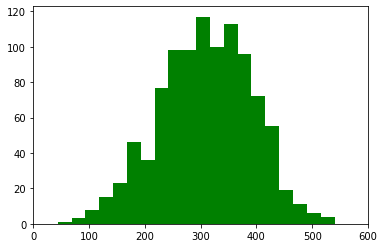

In [9]:
fig, ax = plt.subplots()
ax.set_xlim(0, 600)
ax.hist(winning_damage, bins=20, color='green')
ax.plot()
print('Mean:', np.mean(winning_damage))
print('Standard deviation:', np.std(winning_damage))

Mean: 400.85971943887773
Standard deviation: 56.097095548516606


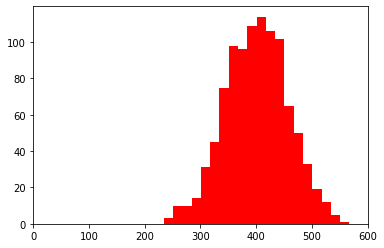

In [10]:
fig, ax = plt.subplots()
ax.set_xlim(0, 600)
ax.hist(losing_damage, bins=20, color='red')
ax.plot()
print('Mean:', np.mean(losing_damage))
print('Standard deviation:', np.std(losing_damage))

In [11]:
for match in matches:
    dmg = match['stats']['stats_data']['damage_taken']
    for player in dmg.keys():
        if player != match['winner']:
            if (dmg[player] < 200):
                print(player, dmg, match['tournament']['name'], match['id'])

In [12]:
for match in matches:
    if match['stats']['stats_data']['stocks_lost'][match['winner']] == 3:
        print(match['id'])

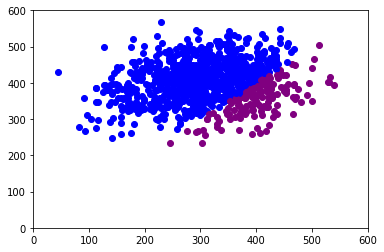

In [13]:
fig, ax = plt.subplots()
ax.set_xlim(0, 600)
ax.set_ylim(0, 600)

for w, l in zip(winning_damage, losing_damage):
    color = 'blue' if w <= l else 'purple'
    plt.scatter(w, l, color=color)
plt.show()
# plt.scatter(winning_damage, losing_damage)

In [14]:
dmg_inversions = sum([w > l for w, l in zip(winning_damage, losing_damage)])
print('Proportion of damage inversions (winner took more damage): ', dmg_inversions/len(winning_damage))

Proportion of damage inversions (winner took more damage):  0.15731462925851702


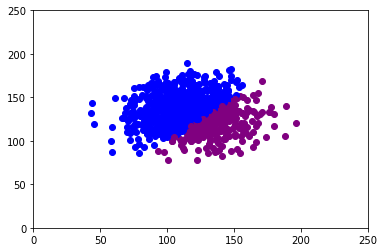

In [15]:
fig, ax = plt.subplots()
ax.set_xlim(0, 250)
ax.set_ylim(0, 250)

for w_dps, l_dps in zip(winning_dps, losing_dps):
    color = 'blue' if w_dps <= l_dps else 'purple'
    plt.scatter(w_dps, l_dps, color=color)
plt.show()
# plt.scatter(winning_dps, losing_dps)
    

In [16]:
proportion = sum([match['stats']['stats_data']['took_first_stock'][match['winner']] for match in matches]) / len(matches)
print('Proportion of games where the taker of the first stock wins the match:', proportion)
print('Margin of error: ', 1.96 * ((proportion)(1 - proportion))

Proportion of games where the taker of the first stock wins the match: 0.7074148296593187


No handles with labels found to put in legend.


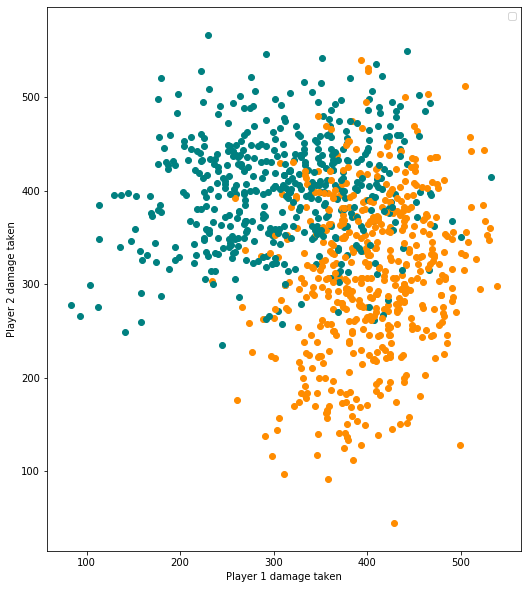

In [31]:
fig, ax = plt.subplots(figsize=(10, 10))

for match in matches:
    p1, p2 = match['players'].keys()
    p1_dmg = match['stats']['stats_data']['damage_taken'][p1]
    p2_dmg = match['stats']['stats_data']['damage_taken'][p2]
    color = 'teal' if p1 == match['winner'] else 'darkorange'
    ax.scatter(p1_dmg, p2_dmg, color=color)
    
ax.set_xlabel('Player 1 damage taken')
ax.set_ylabel('Player 2 damage taken')
ax.set_aspect(1)

plt.show()

Matches by stock difference:


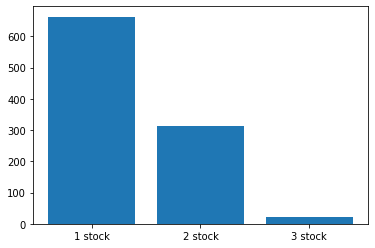

In [17]:
stock_diffs = [len(list(filter(lambda x: min(x['stats']['stats_data']['stocks_lost'].values()) == 3 - i, matches))) for i in range(1, 4)]
plt.bar(['1 stock', '2 stock', '3 stock'], stock_diffs)
print('Matches by stock difference:')

Mean: 139.7179358717435
Standard deviation: 32.64695232238034


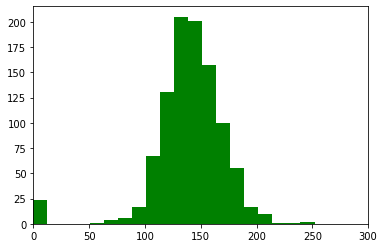

In [18]:
fig, ax = plt.subplots()
ax.set_xlim(0, 300)
ax.hist(winning_avg_death, bins=20, color='green')
ax.plot()
print('Mean:', np.mean(winning_avg_death))
print('Standard deviation:', np.std(winning_avg_death))
# print(winning_avg_death)

Mean: 132.82164328657313
Standard deviation: 19.070333183257468


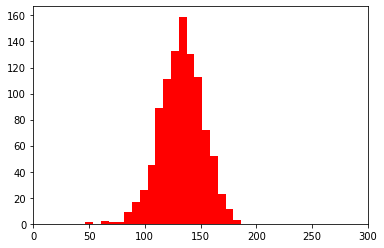

In [19]:
fig, ax = plt.subplots()
ax.set_xlim(0, 300)
ax.hist(losing_avg_death, bins=20, color='red')
ax.plot()
print('Mean:', np.mean(losing_avg_death))
print('Standard deviation:', np.std(losing_avg_death))

['0-3', '0-2', '0-1', '1-0']
[23, 121, 43, 9]
Less than 5% of matches where a player was at a 2 stock deficit ended with that player winning. Interesting!


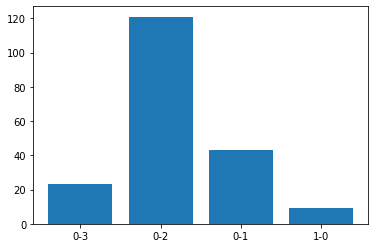

In [20]:
stock_diff = {'0-3': 0, '0-2': 0, '0-1': 0, '1-0': 0}

for match in matches:
    p1_stocks = match['stats']['event_data'][0]['stock_data']
    p2_stocks = match['stats']['event_data'][1]['stock_data']
    if len(p2_stocks) == 0 or len(p1_stocks) > 1 and p1_stocks[1][0] < p2_stocks[0][0]:
        stock_diff[str(3-len(p1_stocks)) + '-' + str(3-len(p2_stocks))] += 1
    elif len(p1_stocks) == 0 or len(p2_stocks) > 1 and p2_stocks[1][0] < p1_stocks[0][0]:
        stock_diff[str(3-len(p2_stocks)) + '-' + str(3-len(p1_stocks))] += 1

print(list(stock_diff.keys()))
print(list(stock_diff.values()))
plt.bar(list(stock_diff.keys()), list(stock_diff.values()))
print('Less than 5% of matches where a player was at a 2 stock deficit ended with that player winning. Interesting!')

In [21]:
outcomes = [[0, 0], [0, 0], [0, 0], [0, 0]]

for match in matches:
    for key in match['players'].keys():
        num_early_deaths = sum(percent <= 100 and percent > 0 for percent in match['stats']['stats_data']['death_percents'][key])
        if (num_early_deaths == 3):
            print(match['id'])
        outcomes[num_early_deaths][1 if key == match['winner'] else 0] += 1

print([o[0] for o in outcomes])
print([o[1] for o in outcomes])
print([o[1]/(o[1]+o[0]) for o in outcomes])

8b8cb160-ae9d-4168-ba0c-c011818ef3f0
[680, 277, 40, 1]
[899, 95, 4, 0]
[0.5693476884103863, 0.2553763440860215, 0.09090909090909091, 0.0]


In [22]:
character_freq = {}
character_reps = {}
for match in matches:
    for player in match['players'].values():
        char = player['character']['internal_name']
        if char not in character_freq:
            character_freq[char] = 0
            character_reps[char] = set()
        character_freq[char] += 1
        character_reps[char].add(player['id'])

characters = sorted(filter(lambda key: character_freq[key] >= 30, character_freq.keys()), key=lambda key: -character_freq[key])

for char in characters:
    print(char, character_freq[char], character_reps[char])

peach 170 {'nairo', 'zackray', 'samsora', 'muteace', 'dabuz'}
olimar 151 {'sst| shuton', 'shuton', 'myran', 'dabuz'}
joker 124 {'void', 'tsu', 'mkleo', 'zackray', 'alsuda', 'sharp'}
inkling 109 {'cosmos', 'protobanham', 'abadango', 'armada'}
zero_suit_samus 108 {'marss', 'acnologia', 'shky', 'nairo', 'samsora', 'choco', 'esam'}
palutena 105 {'nairo', 'samsora', 'dabuz'}
fox 92 {'zd', 'light', 'paseriman'}
pikachu 91 {'esam'}
pokemon_trainer 90 {'puppeh', 'leffen', 'tweek'}
mr_game_and_watch 84 {'leon', 'maister', 'zackray', 'muteace'}
wolf 82 {'cashew', 'jakal', 'zero', 'mkleo', 'tweek', 'mew2king', 'seagulljoe', 'nairo', 'zackray'}
pac_man 82 {'tea', 'sinji'}
wario 82 {'mang0', 'kameme', 'tweek', 'glutonny', 'zackray'}
pichu 79 {'void', 'rfang', 'blacktwins13', 'nietono', 'maister'}
mario 74 {'stroder', 'ally', 'darkwizzy', 'prodigy', 'zackray'}
lucina 71 {'mre', 'mkleo', 'nairo', 'zackray', 'vermillion', 'protobanham'}
rob 53 {'raffi-x', 'wadi', 'zackray', 'kusa', 'dill'}
rosalina_an

In [23]:
char_colors = {'peach': 'pink', 'olimar': 'bisque', 'joker': 'firebrick', 'inkling': 'darkorange',
               'zero_suit_samus': 'deepskyblue', 'palutena': 'limegreen', 'fox': 'goldenrod', 'pikachu': 'yellow',
               'pokemon_trainer': 'tomato', 'mr_game_and_watch': 'black', 'wolf': 'darkorchid', 'pac_man': 'yellow',
               'wario': 'gold'}

In [24]:
kill_pcts = {}
death_pcts = {}

avg_kills = {}
avg_deaths = {}

for char in characters:
    kill_pcts[char] = []
    death_pcts[char] = []

for match in matches:
    player_1, player_2 = match['players'].keys()
    char_1 = match['players'][player_1]['character']['internal_name']
    char_2 = match['players'][player_2]['character']['internal_name']
    deaths_1 = match['stats']['stats_data']['death_percents'][player_1]
    deaths_2 = match['stats']['stats_data']['death_percents'][player_2]
    
    if char_1 in characters:
        if char_1 == 'peach' and len(deaths_1) > 0 and min(deaths_1) <= 50:
            print(match['id'], min(deaths_1))
        death_pcts[char_1].extend(deaths_1)
        kill_pcts[char_1].extend(deaths_2)
        
    if char_2 in characters:
        if char_2 == 'peach' and len(deaths_2) > 0 and min(deaths_2) <= 50:
            print(match['id'], min(deaths_2))
        death_pcts[char_2].extend(deaths_2)
        kill_pcts[char_2].extend(deaths_1)
        
for char in characters:
    death_pcts[char] = list(filter(lambda x: x > 0, death_pcts[char]))
    kill_pcts[char] = list(filter(lambda x: x > 0, kill_pcts[char]))

913f084a-30b6-4302-b762-6d0b7d96a152 16
d51a4a21-db70-461a-9adb-9948f5e8e2d0 43
1c3c4139-b813-4d43-ba7b-2df8c448ed57 49
add3b11f-421c-4df8-ac0b-5f94e4feeae1 0
7b104b2a-db37-4b9d-9f4e-dc80dc2912e4 32
95787e1a-879b-4e08-84dd-3f0f6ffaae7d 0


In [25]:
def plot_character_deaths(char, color):
    fig, ax = plt.subplots()
    ax.set_xlim(0, 300)
    ax.set_xlabel(char + ' death percentages')
    ax.hist(death_pcts[char], bins=20, color=color)
    ax.plot()
    print('Mean:', np.mean(death_pcts[char]))
    print('Standard deviation:', np.std(death_pcts[char]))
    
def plot_character_kills(char, color):
    fig, ax = plt.subplots()
    ax.set_xlim(0, 300)
    ax.set_xlabel(char + ' kill percentages')
    ax.hist(death_pcts[char], bins=20, color=color)
    ax.plot()
    print('Mean:', np.mean(kill_pcts[char]))
    print('Standard deviation:', np.mean(kill_pcts[char]))

Mean: 136.23543689320388
Standard deviation: 31.677308140413647
Mean: 128.93957703927492
Standard deviation: 29.043294671576373
Mean: 139.73469387755102
Standard deviation: 25.08758169928967
Mean: 140.38076923076923
Standard deviation: 28.728657887615782
Mean: 134.86290322580646
Standard deviation: 25.94747631379882
Mean: 141.75336322869956
Standard deviation: 29.627086971396054
Mean: 125.41363636363636
Standard deviation: 26.528831579221084
Mean: 130.88
Standard deviation: 25.82509632121437
Mean: 136.875
Standard deviation: 35.24094479174494
Mean: 130.13812154696132
Standard deviation: 24.25822716980139
Mean: 136.515
Standard deviation: 27.251601329096243
Mean: 136.66492146596858
Standard deviation: 31.394680158767653
Mean: 147.56216216216217
Standard deviation: 30.356043535165092


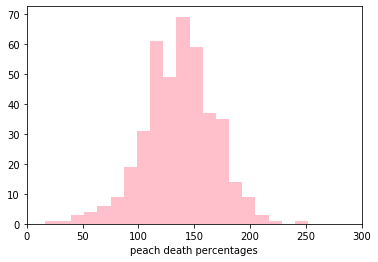

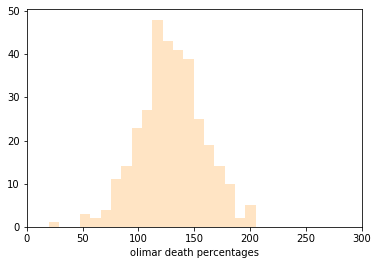

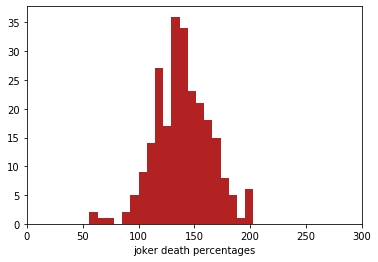

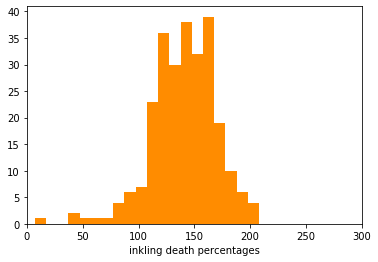

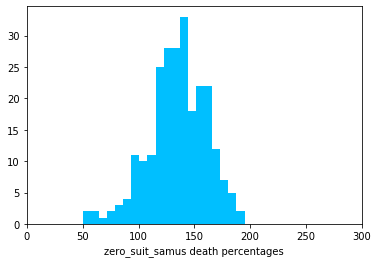

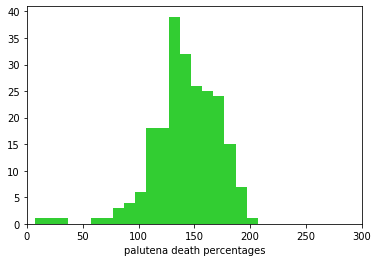

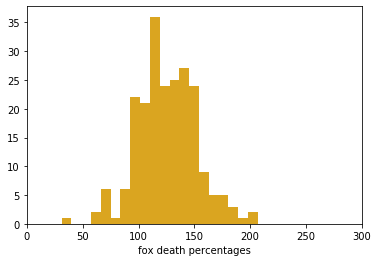

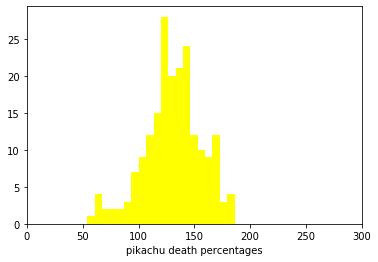

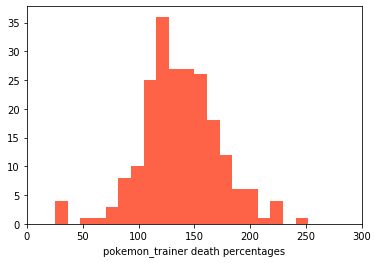

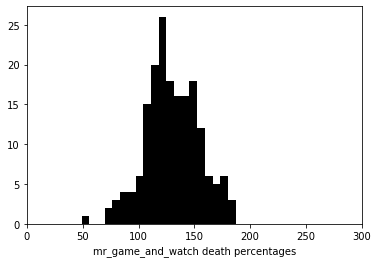

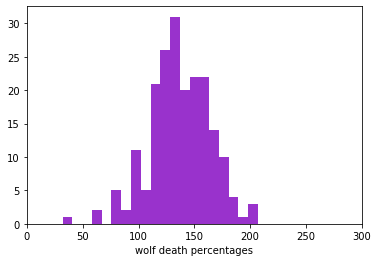

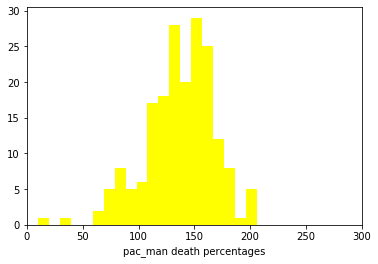

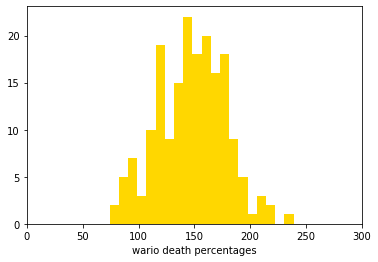

In [26]:
for char in char_colors.keys():
    plot_character_deaths(char, char_colors[char])

Mean: 149.22680412371133
Standard deviation: 149.22680412371133
Mean: 141.97486033519553
Standard deviation: 141.97486033519553
Mean: 136.58282208588957
Standard deviation: 136.58282208588957
Mean: 146.96170212765958
Standard deviation: 146.96170212765958
Mean: 125.9463601532567
Standard deviation: 125.9463601532567
Mean: 131.51737451737452
Standard deviation: 131.51737451737452
Mean: 131.60576923076923
Standard deviation: 131.60576923076923
Mean: 135.95794392523365
Standard deviation: 135.95794392523365
Mean: 128.28865979381445
Standard deviation: 128.28865979381445
Mean: 136.81
Standard deviation: 136.81
Mean: 140.24719101123594
Standard deviation: 140.24719101123594
Mean: 144.19473684210527
Standard deviation: 144.19473684210527
Mean: 132.1421052631579
Standard deviation: 132.1421052631579


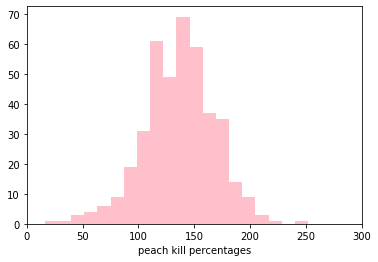

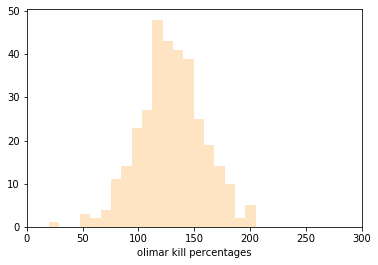

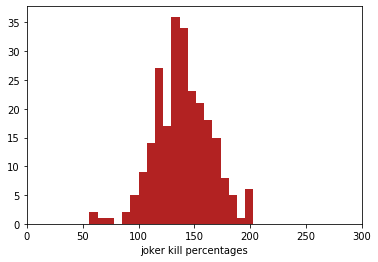

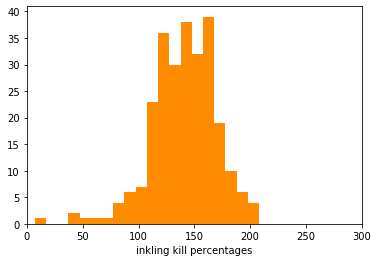

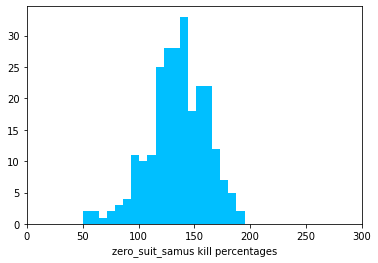

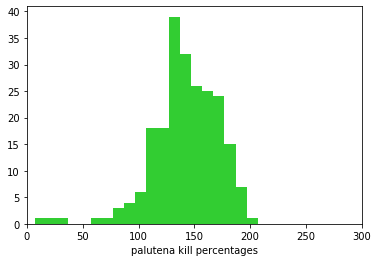

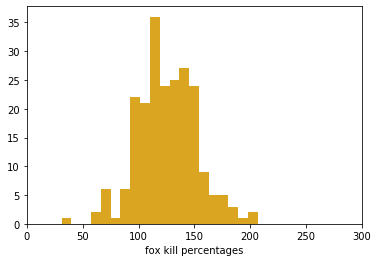

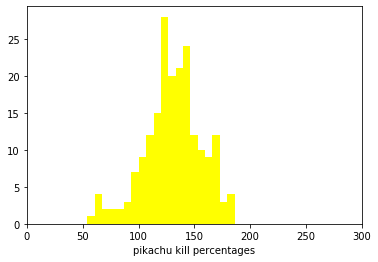

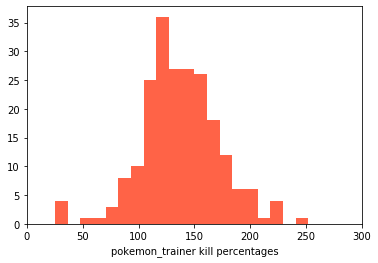

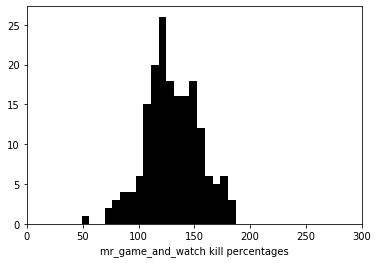

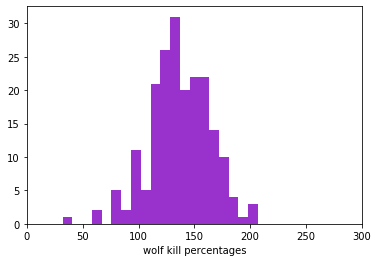

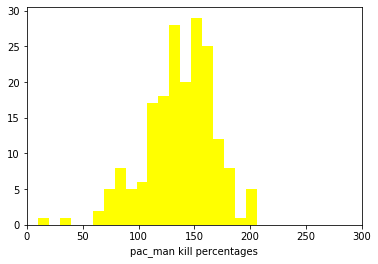

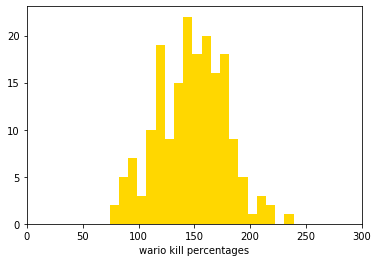

In [27]:
for char in char_colors.keys():
    plot_character_kills(char, char_colors[char])

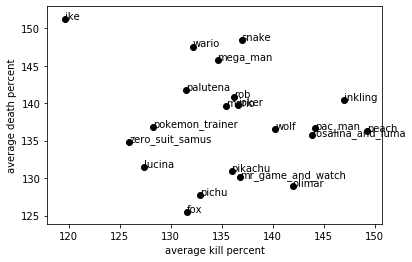

In [28]:
fig, ax = plt.subplots()
for char in characters:
    avg_death = np.mean(death_pcts[char])
    avg_kill = np.mean(kill_pcts[char])
    ax.scatter(avg_kill, avg_death, color='black')
    ax.annotate(char, (avg_kill, avg_death))

ax.set_xlabel('average kill percent')
ax.set_ylabel('average death percent')
plt.show()

In [29]:
for match in matches:
    for deaths in match['stats']['stats_data']['death_percents'].values():
        if len(deaths) > 0 and min(deaths) == 0:
            print(match['id'])

4733795d-2de7-42d8-876b-928c7370eb3d
b78833c0-c586-49b5-a273-dfa7b05d19d5
b685429e-f3bd-42df-8d39-54b64c0e3efc
b685429e-f3bd-42df-8d39-54b64c0e3efc
0b1e77de-827f-4a92-a3e8-1cf138b6768d
92d10617-b00d-4fed-88a7-e05a83d695ed
c8d5e064-cb9d-457f-9d2a-8160c45df2b9
f8b8c04d-ec52-4034-968b-0cf6a1c8a6b7
7ab2426b-a14f-486f-98f0-d43b79b1aa8f
8923e763-b543-4838-8ccf-cb89dde600b1
add3b11f-421c-4df8-ac0b-5f94e4feeae1
c66f6fc3-95e8-4918-b756-5e07771851ea
22c76e6d-0268-42b2-ba01-0f551c8e1c14
19bede18-ea91-476f-9d83-43b52ac4430c
95787e1a-879b-4e08-84dd-3f0f6ffaae7d
63c66f1a-c850-4bfb-9fa8-71c7be80401e


In [34]:
three_stocks = {}
three_stocked = {}
for match in matches:
    stocks_lost = match['stats']['stats_data']['stocks_lost']
    for player in stocks_lost.keys():
        if stocks_lost[player] == 0:
            if player not in three_stocks:
                three_stocks[player] = 0
            three_stocks[player] += 1
        if match['stats']['stats_data']['stocks_taken'][player] == 0:
            if player not in three_stocked:
                three_stocked[player] = 0
            three_stocked[player] += 1

print(three_stocks)
print(three_stocked)

{'tweek': 2, 'maister': 1, 'dabuz': 2, 'esam': 4, 'leffen': 3, 'zackray': 1, 'samsora': 1, 'mkleo': 2, 'darkwizzy': 1, 'marss': 1, 'shuton': 2, 'void': 1, 'glutonny': 1, 'light': 1}
{'tea': 1, 'samsora': 2, 'dill': 1, 'esam': 1, 'void': 1, 'tweek': 1, 'armada': 1, 'light': 2, 'maister': 1, 'rfang': 1, 'marss': 1, 'cosmos': 2, 'myran': 2, 'zackray': 1, 'glutonny': 2, 'leffen': 1, 'plup': 1, 'missmochamae': 1}


In [47]:
matchups = {}
for char1 in characters:
    matchups[char1] = {}
    for char2 in characters:
        matchups[char1][char2] = []

for match in matches:
    for player in match['players'].values():
        if player['id'] == match['winner']:
            win_char = player['character']['internal_name']
        else:
            lose_char = player['character']['internal_name']
    
    if win_char in characters and lose_char in characters:
        matchups[win_char][lose_char].append(1)
        matchups[lose_char][win_char].append(0)

print(matchups['rob']['mario'])
mu_arr = np.array([[np.mean(matchups[char1][char2]) for char2 in characters] for char1 in characters])

[0, 0, 0]


/Users/calvin/miniconda3/envs/tf/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/calvin/miniconda3/envs/tf/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


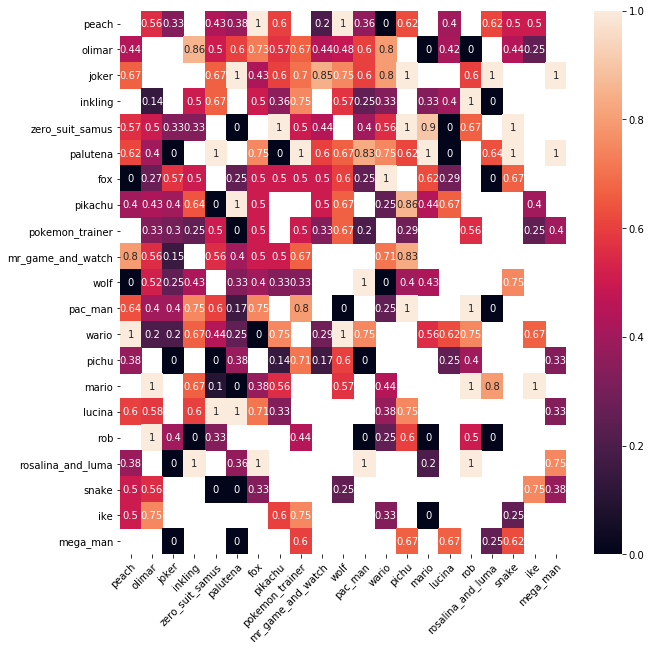

In [46]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 10))

# ax.imshow(mu_arr)
ax = sns.heatmap(mu_arr, xticklabels = characters, yticklabels = characters, annot=True)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.show()

In [98]:
dmg_taken = {player: [] for player in players}
dmg_dealt = {player: [] for player in players}

for match in matches:
    p1, p2 = match['players'].keys()
    dmg1 = match['stats']['stats_data']['damage_taken'][p1]
    dmg2 = match['stats']['stats_data']['damage_taken'][p2]
    
    dmg_taken[p1].append(dmg1)
    dmg_taken[p2].append(dmg2)
    dmg_dealt[p1].append(dmg2)
    dmg_dealt[p2].append(dmg1)

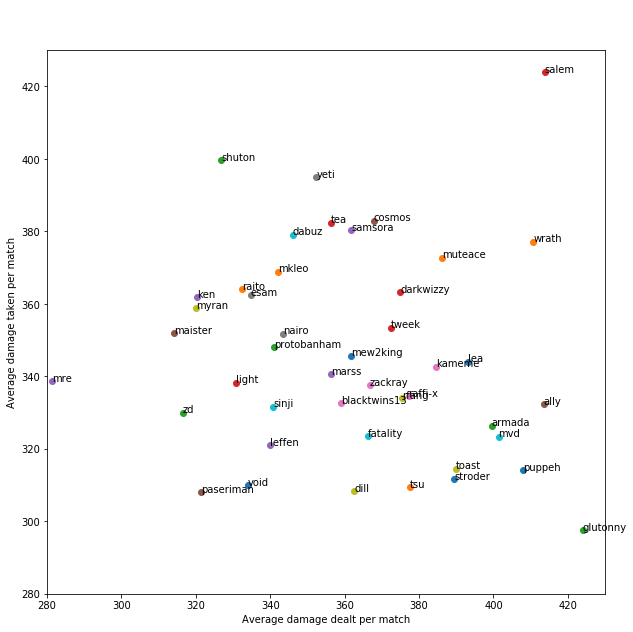

In [136]:
fig, ax = plt.subplots(figsize=(10, 10))
for player in players:
    if len(dmg_taken[player]) < 5:
        continue
    x = np.mean(dmg_taken[player])
    y = np.mean(dmg_dealt[player])
    ax.scatter(x, y)
    ax.annotate(player, (x, y))
    
ax.set_xlabel('Average damage dealt per match')
ax.set_ylabel('Average damage taken per match')
ax.set_xlim(280, 430)
ax.set_ylim(280, 430)

plt.show()

In [71]:
stocks_taken = {player: [] for player in players}
stocks_lost = {player: [] for player in players}
for match in matches:
    for player in match['players']:
        stocks_taken[player].append(match['stats']['stats_data']['stocks_taken'][player])
        stocks_lost[player].append(match['stats']['stats_data']['stocks_lost'][player])

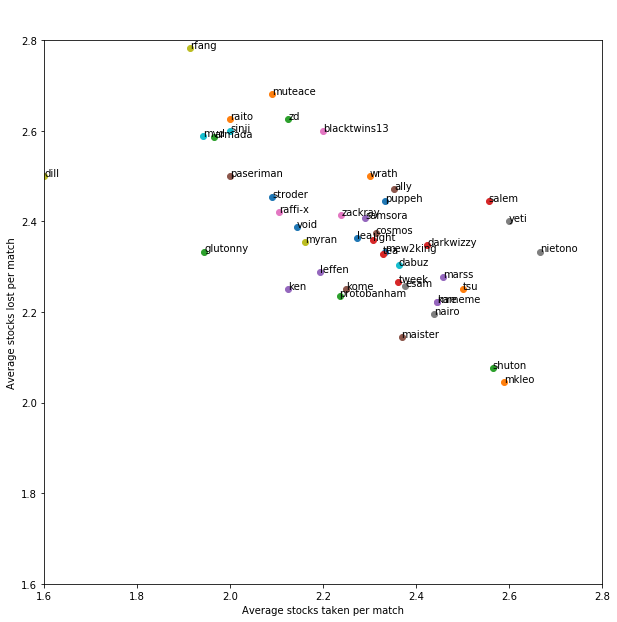

In [137]:
fig, ax = plt.subplots(figsize=(10, 10))
for player in players:
    if len(dmg_taken[player]) < 5:
        continue
    x = np.mean(stocks_taken[player])
    y = np.mean(stocks_lost[player])
    ax.scatter(x, y)
    ax.annotate(player, (x, y))
    
ax.set_xlabel('Average stocks taken per match')
ax.set_ylabel('Average stocks lost per match')
ax.set_xlim(1.6, 2.8)
ax.set_ylim(1.6, 2.8)

plt.show()

In [126]:
avg_kill = {player: [] for player in players}
avg_death = {player: [] for player in players}

for match in matches:
    p1, p2 = match['players'].keys()
    deaths1 = match['stats']['stats_data']['death_percents'][p1]
    deaths2 = match['stats']['stats_data']['death_percents'][p2]
    
    if len(deaths1) > 0 and min(deaths1) == 0 or len(deaths2) > 0 and min(deaths2) == 0:
        continue
    
    avg_kill[p1].extend(deaths2)
    avg_kill[p2].extend(deaths1)
    avg_death[p1].extend(deaths1)
    avg_death[p2].extend(deaths2)

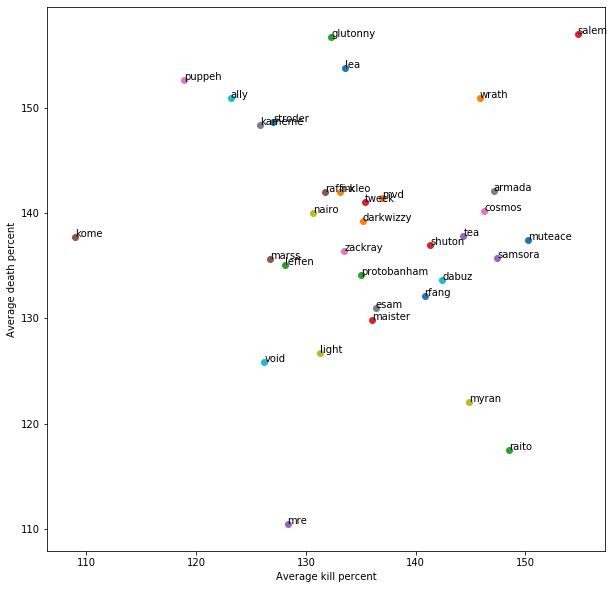

In [129]:
fig, ax = plt.subplots(figsize=(10, 10))
for player in players:
    if len(avg_kill[player]) < 20:
        continue
    x = np.mean(avg_kill[player])
    y = np.mean(avg_death[player])
    ax.scatter(x, y)
    ax.annotate(player, (x, y))
    
ax.set_xlabel('Average kill percent')
ax.set_ylabel('Average death percent')

plt.show()

In [147]:
avg_kill_by_char = {player: {} for player in players}
avg_death_by_char = {player: {} for player in players}

for match in matches:
    p1, p2 = match['players'].keys()
    deaths1 = match['stats']['stats_data']['death_percents'][p1]
    deaths2 = match['stats']['stats_data']['death_percents'][p2]
    char1 = match['players'][p1]['character']['internal_name']
    char2 = match['players'][p2]['character']['internal_name']
    
    if len(deaths1) > 0 and min(deaths1) == 0 or len(deaths2) > 0 and min(deaths2) == 0:
        continue
    
    if char1 not in avg_kill_by_char[p1]:
        avg_kill_by_char[p1][char1] = []
        avg_death_by_char[p1][char1] = []
    if char2 not in avg_kill_by_char[p2]:
        avg_kill_by_char[p2][char2] = []
        avg_death_by_char[p2][char2] = []
    
    avg_kill_by_char[p1][char1].extend(deaths2)
    avg_kill_by_char[p2][char2].extend(deaths1)
    avg_death_by_char[p1][char1].extend(deaths1)
    avg_death_by_char[p2][char2].extend(deaths2) 

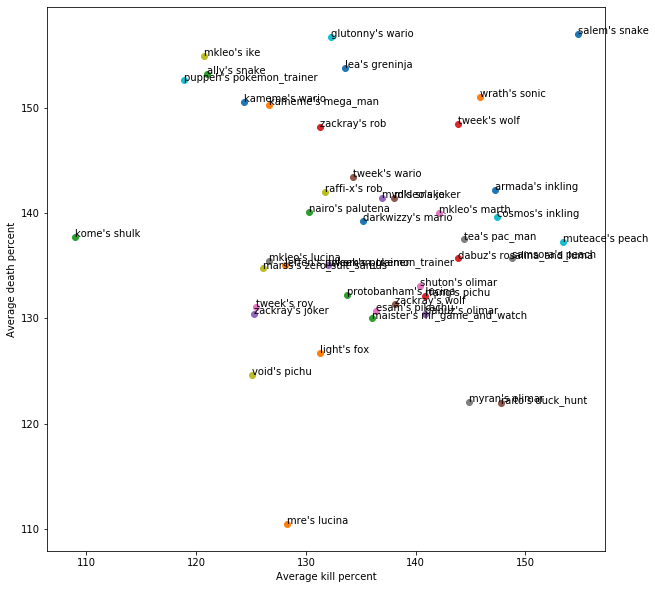

In [138]:
fig, ax = plt.subplots(figsize=(10, 10))
for player in players:
    for char in avg_kill_by_char[player].keys():
        if len(avg_kill_by_char[player][char]) < 20:
            continue
            
        x = np.mean(avg_kill_by_char[player][char])
        y = np.mean(avg_death_by_char[player][char])
        ax.scatter(x, y)
        ax.annotate(player + "'s " + char, (x, y))
    
ax.set_xlabel('Average kill percent')
ax.set_ylabel('Average death percent')

plt.show()

In [110]:
print(avg_kill_by_char['kome']['shulk'])

[153, 130, 112, 125, 91, 81, 140, 112, 178, 88, 103, 80, 100, 91, 116, 162, 104, 98, 83, 88, 100, 127, 59, 94, 92, 145, 83, 157, 65, 108, 131, 103, 124, 87, 128, 84]


In [116]:
for match in matches:
    players = list(match['players'].keys())
    other = players[0] if players[0] != 'kome' else players[1]
    if 'kome' in match['players'] and 80 in match['stats']['stats_data']['death_percents'][other]:
        print(match['id'])

8d710314-e8d2-472c-8388-a6fcfb347aa6


In [144]:
stocks_taken_by_char = {player: {} for player in players}
stocks_lost_by_char = {player: {} for player in players}

for match in matches:
    for player in match['players'].keys():
        char = match['players'][player]['character']['internal_name']
        if char not in stocks_taken_by_char[player]:
            stocks_taken_by_char[player][char] = []
        if char not in stocks_lost_by_char[player]:
            stocks_lost_by_char[player][char] = []
        stocks_taken_by_char[player][char].append(match['stats']['stats_data']['stocks_taken'][player])
        stocks_lost_by_char[player][char].append(match['stats']['stats_data']['stocks_lost'][player])

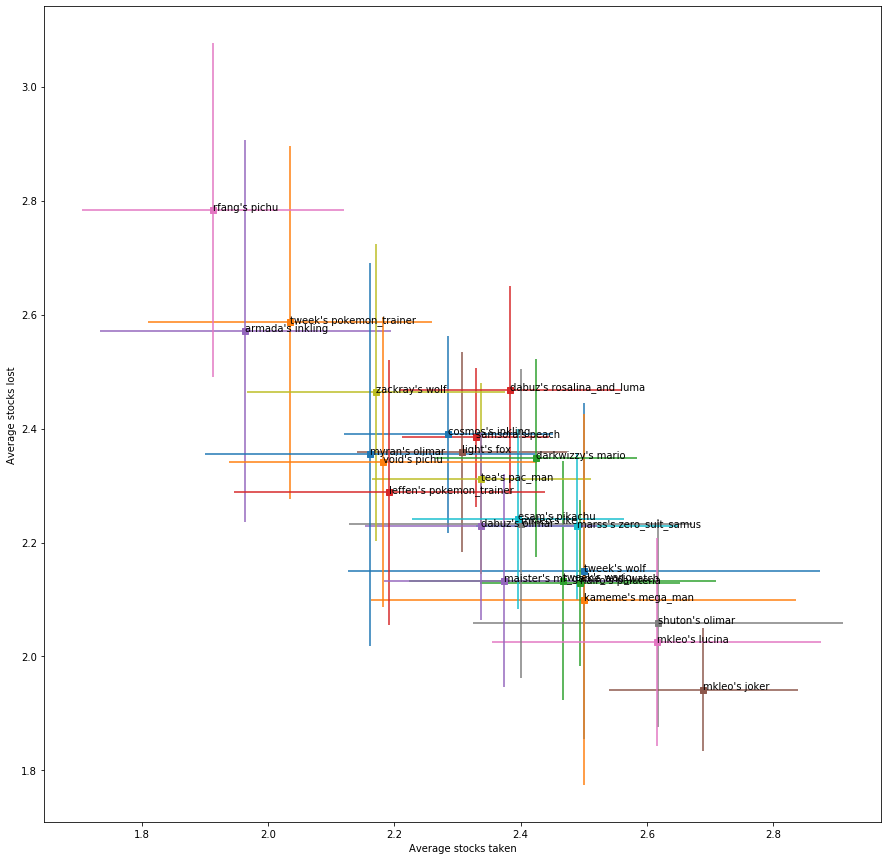

In [163]:
fig, ax = plt.subplots(figsize=(15, 15))
for player in players:
    for char in stocks_taken_by_char[player].keys():
        if len(stocks_taken_by_char[player][char]) < 20:
            continue
            
        x = np.mean(stocks_taken_by_char[player][char])
        y = np.mean(stocks_lost_by_char[player][char])
        stdx = 1.96 * np.std(stocks_taken_by_char[player][char]) / (len(stocks_taken_by_char[player][char]) ** 0.5)
        stdy = 1.96 * np.std(stocks_lost_by_char[player][char]) / (len(stocks_lost_by_char[player][char]) ** 0.5)
        ax.errorbar(x, y, stdx, stdy, marker='s') # 95% confidence intervals
        ax.annotate(player + "'s " + char, (x, y))
    
ax.set_xlabel('Average stocks taken')
ax.set_ylabel('Average stocks lost')

plt.show()

In [151]:
for match in matches:
    if match['set']['prev_match_id'] == match['id']:
        print(match['id'])
    if match['set']['next_match_id'] == match['id']:
        print(match['id'])

44bb99ae-f12b-4b05-bf97-ccfbc68aa69c
d0047522-0cbc-4f25-9115-5f0b621f7e45
162f1007-6201-4907-b9c9-8976de08e374
c770122a-3b61-4c44-8337-9c48f6c9edbb
dc79d151-e714-4deb-8b23-ddf7b3548be1
306d38ea-5581-475a-bb51-f2c191283a99
d3929db1-e29f-471b-bec9-1449eac14130
b57b698a-08fe-4688-95a6-11d010f8537b
427307cc-9e99-4bae-84d4-69a141aa0f07
bbfbfa2a-0a49-4977-8f14-502032b443f4
89b09920-9702-4e1a-95ae-8eb27609da12
85af2bae-8717-4645-8f2f-b287af242b0f
8710ae5e-f60b-490a-be93-3b22137d1e8d
813ee979-e258-4d01-8d11-355402e73f56
21efcd32-aaf3-4fab-9168-b5d075963539
c8ef9585-e3d3-41ba-821e-352bf18b2281


In [150]:
for match in matches:
    print(match['id'], match['tournament']['name'], match['set']['bracket_full'], match['set']['index'])

93eea6f9-79ae-4708-846e-fd537f64e78d Frostbite Grand Finals (Reset) 1
608c3ec5-b396-4beb-9791-ab966f50f394 Frostbite Grand Finals (Reset) 2
a6072297-079a-4261-9b22-e3547f8145e9 Frostbite Grand Finals (Reset) 3
4554222b-49f4-4992-b24e-346d5f176f69 Frostbite Grand Finals 1
5f8344b6-bad2-46f2-ac6d-12fc4719c084 Frostbite Grand Finals 2
70f8f101-e222-4a78-98a0-980b1f09e70d Frostbite Grand Finals 3
05068a85-f2c2-4a62-9b7f-813a07e85a37 Frostbite Losers Semi-Final 1
19e0cc99-b5fe-4fe7-9d35-3440dae3f9be Frostbite Losers Semi-Final 2
549428cd-5211-43d8-a439-72a22f5e26c5 Frostbite Losers Semi-Final 3
d01ae5d9-31ea-4586-b48a-e3d7bff9f0a6 Frostbite Losers Semi-Final 4
7eef15a1-5531-4682-913d-6b197e360da1 Frostbite Losers Semi-Final 5
0aff6fb4-aec5-43de-ab29-ac9b52c7348e Frostbite Losers Semi-Final 1
5c41352e-b5fb-4054-a8a0-dbba01f5aa6e Frostbite Losers Semi-Final 2
b08f43ce-7c41-46b8-bf12-6a479e16af3a Frostbite Losers Semi-Final 3
2f8bc141-8577-420e-88ab-a022ebdd4548 Frostbite Losers Semi-Final 4
4

07e43a28-cdb1-4634-9578-bd85610857ac Ultimate Summit Pools 1
97ade7ea-3fe4-4ed6-a1a0-f3cdb5809856 Ultimate Summit Pools 2
f603ca49-447a-430e-81f9-32eadda123ce Ultimate Summit Pools 3
9d689269-7c66-4cdf-83cf-7667c7622b84 Ultimate Summit Pools 4
048bf0f5-f7a8-4164-a5b0-3c002d849148 Ultimate Summit Pools 1
7ccb7ffd-dd6b-45da-8487-450ce928e769 Ultimate Summit Pools 2
45f1c007-c2ea-4d80-a816-140cd0f1c933 Ultimate Summit Pools 3
a5f24032-5460-47c3-8f63-8145277e725d Ultimate Summit Pools 1
49522411-1db1-4bed-bfa8-ad7b972817e0 Ultimate Summit Pools 2
d18185fc-9404-4598-8598-b599c0536da1 Ultimate Summit Pools 3
6c3b687c-7b98-45ad-9e56-97855cf0c063 Ultimate Summit Pools 4
0c21dfef-69c3-47a0-8469-6c4df8505258 Ultimate Summit Pools 1
02f0febe-70a5-465c-90b4-23c352aacb2f Ultimate Summit Pools 2
b5943948-1e30-468f-8928-6721b21cf4c4 Ultimate Summit Pools 3
222cd833-9c41-4c79-b004-a49663a722be Ultimate Summit Pools 4
cfba6477-9b29-4911-83e9-ad0ab89a6d82 Ultimate Summit Pools 5
ae1bebc3-5a4b-4965-bcf6-

74131c9b-7df3-4912-a8f2-207658c1b7dc Smash Ultimate Summit Losers Quarter-Final 3
7264ee97-f0d0-4d0a-87be-3f41c4013b64 Smash Ultimate Summit Winners Semi-Final 1
79e59cd6-e9ad-4d30-b225-d7907ab2cede Smash Ultimate Summit Winners Semi-Final 2
ee0331c6-244d-4756-8177-6eaad8f2623e Smash Ultimate Summit Winners Semi-Final 3
c5728122-3444-4ef4-a19e-ba8f02640059 Smash Ultimate Summit Winners Semi-Final 1
f2c9eeb8-9592-443d-9bc3-439fdd2225e3 Smash Ultimate Summit Winners Semi-Final 2
0d56ae26-d555-44ac-9d20-aa160921f337 Smash Ultimate Summit Winners Semi-Final 3
19bede18-ea91-476f-9d83-43b52ac4430c Smash Ultimate Summit Losers Round 3 1
6347b1db-a812-43d3-952f-d4fefa78be54 Smash Ultimate Summit Losers Round 3 2
3f4035a4-3ed2-4943-a323-a36b89ca5508 Smash Ultimate Summit Losers Round 3 3
1339965a-4339-442a-b289-cb3a1227ccf4 Smash Ultimate Summit Losers Round 3 1
80ca8cbd-6338-4485-82a3-a05e616d0d4c Smash Ultimate Summit Losers Round 3 2
4420d35e-ea3e-47f0-a055-a5ef91ad5799 Smash Ultimate Summit

In [221]:
match_state = [[[[] for _ in range(11)] for _ in range(3)] for _ in range(3)]

for match in matches:
    p1_event_data, p2_event_data = match['stats']['event_data']
    p1_wins = len(p2_event_data['health_at_death_data']) == 3
    
    p2_idx = 0
    p2_stocks_lost = 0
    for death_num in range(min(2, len(p1_event_data['health_at_death_data']))):
        p1_death_time = p1_event_data['health_at_death_data'][death_num][0]
        health_data = p2_event_data['health_data']
        
        while p2_idx < len(health_data) - 1 and health_data[p2_idx+1][0] < p1_death_time:
            p2_idx += 1
            if health_data[p2_idx][1] == 0:
                p2_stocks_lost += 1
        p2_dmg = health_data[p2_idx][1]
        p2_dmg_binned = min(10, p2_dmg // 20)
        match_state[death_num+1][p2_stocks_lost][p2_dmg_binned].append(p1_wins)
            
    p1_idx = 0
    p1_stocks_lost = 0
    for death_num in range(min(2, len(p2_event_data['health_at_death_data']))):
        p2_death_time = p2_event_data['health_at_death_data'][death_num][0]
        health_data = p1_event_data['health_data']
        
        while p1_idx < len(health_data) - 1 and health_data[p1_idx+1][0] < p2_death_time:
            p1_idx += 1
            if health_data[p1_idx][1] == 0:
                p1_stocks_lost += 1
        p1_dmg = health_data[p1_idx][1]
        p1_dmg_binned = min(10, p1_dmg // 20)
        if p1_stocks_lost == 3:
            break
        match_state[death_num+1][p1_stocks_lost][p1_dmg_binned].append(not p1_wins)

for death_num in range(1, 3):
    for stocks_lost in range(3):
        for dmg_bin in range(11):
            match_state[death_num][stocks_lost][dmg_bin] = np.mean(match_state[death_num][stocks_lost][dmg_bin])
        
print(match_state[1])
print(match_state[2])
    
#     print(match['stats']['event_data'][1]['health_at_death_data'])


ee42f44a-56ca-43f4-b6ac-96526350cb5c
23aeadea-d303-4c3c-9ae8-76b39b1be1df
01ec833f-c4c9-41c2-8073-372920315499
3b7edf48-8c8c-4513-9241-e3ffbd177b49
[[0.17647058823529413, 0.16304347826086957, 0.20909090909090908, 0.29533678756476683, 0.33658536585365856, 0.3546511627906977, 0.3644067796610169, 0.2777777777777778, 0.2222222222222222, nan, 1.0], [0.5458015267175572, 0.6382978723404256, 0.6976744186046512, 0.66, 0.7037037037037037, 0.8627450980392157, 0.8695652173913043, 0.6666666666666666, 1.0, nan, nan], [0.948051948051948, 0.8888888888888888, 0.9411764705882353, 0.9523809523809523, 1.0, 1.0, 1.0, 1.0, nan, nan, nan]]
[[nan, 0.0, 0.0, 0.0, 0.027777777777777776, 0.08695652173913043, 0.04878048780487805, 0.05714285714285714, 0.0, 0.0, 0.0], [0.08695652173913043, 0.14583333333333334, 0.16363636363636364, 0.23255813953488372, 0.3153153153153153, 0.2796610169491525, 0.39759036144578314, 0.4444444444444444, 0.3333333333333333, 0.25, nan], [0.5526315789473685, 0.631578947368421, 0.639534883720